# crisp-dm=cross industry standard procedure fro data mining
- 1.Business understanding 
- 2.Data colletion 
- 3.Data cleaning/EDA/Feature Engineering
- 4.Model Building
- 5.Model Evaluation
- 6.Deployment


# Statistics
- 1.Descriptive/ Summary 
- 2. Infertial

# Descriptive
- a.Statistical measures
- b.Tables
- c.Graphs

## Statistical measures
- 1.Measures of central tendency
    -  a.Mean
    -  b.Median
    -  c.Mode
- 2.Measures of dispersion/spreads
    - a.Variance
    - b.Range
    - c.IQR
    - d.Standard Deviation
- 3.Measures of Shapes
    - a.Skewness
    - b.kurtosis
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Business Understanding
### Predicting the Survival of Titanic Passengers

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

# Data collection

In [3]:
data=sns.load_dataset('titanic')

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Data cleaning/EDA/Feature Engineering

In [7]:
data.drop('deck',axis=1,inplace=True)

In [8]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
data['age'].fillna(data['age'].mean(),inplace=True)

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [12]:
data.parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

### maximum number(678) of persons are travelling alone followed by one(118) & two(80). 

In [13]:
data['family']=data['sibsp']+data['parch']

In [14]:
data['family'].value_counts()

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

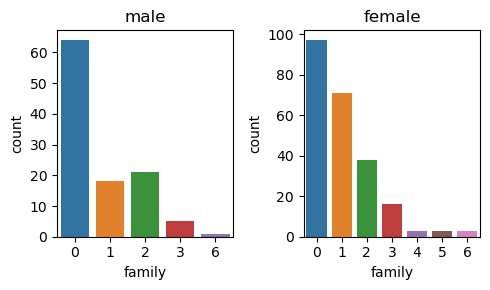

In [15]:
plt.figure(figsize=(5,3))
plt.subplot(1,2,1)
sns.countplot(x=data[(data['alive']=='yes')&(data['sex']=='male')]['family'],data=data)
plt.title('male')

plt.subplot(1,2,2)
sns.countplot(x=data[(data['alive']=='yes')&(data['sex']=='female')]['family'],data=data)
plt.title('female')

plt.tight_layout()
plt.show()

### Both male & female have higher chances of survival when travelling alone, but female has comparatively 
### more chance than male.Also female with family has more chance of survival.
### As family  members increses the chances of survival decreases drastically.


In [16]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0


In [17]:
data.pclass.value_counts()

3    491
1    214
2    184
Name: pclass, dtype: int64

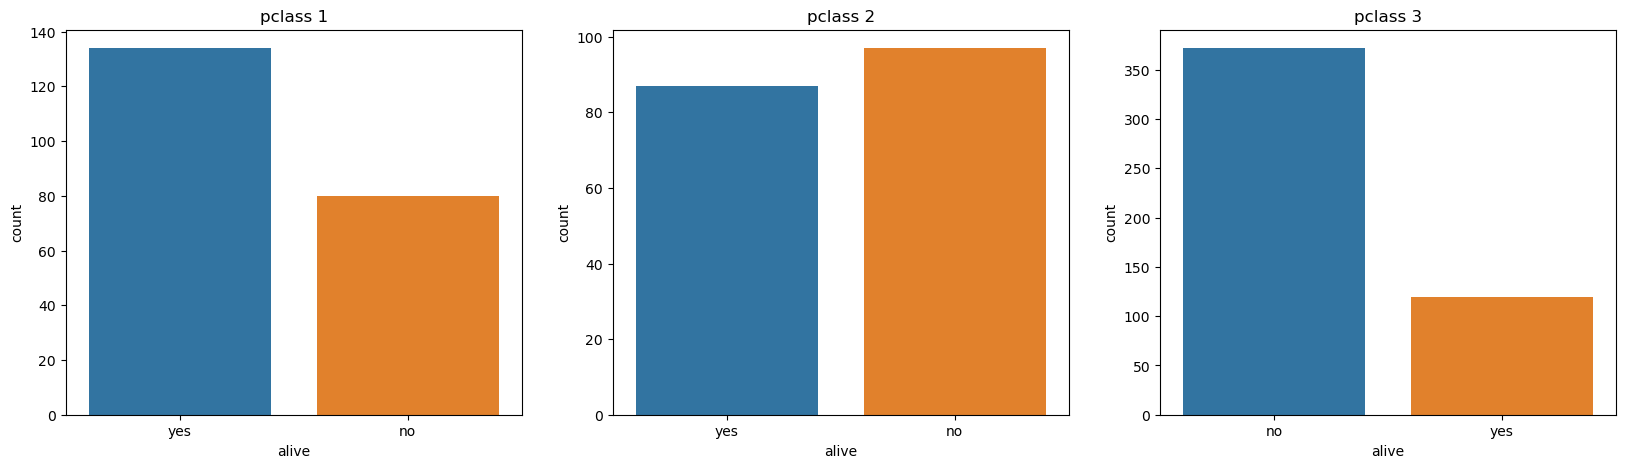

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x=data[data["pclass"]==1]["alive"],data=data)
plt.title("pclass 1")

plt.subplot(1,3,2)
sns.countplot(x=data[data["pclass"]==2]["alive"],data=data)
plt.title("pclass 2")

plt.subplot(1,3,3)
sns.countplot(x=data[data["pclass"]==3]["alive"],data=data)
plt.title("pclass 3")

plt.show()

### We see that when pclass is 1 the chances of servival is more than as compared to other class.
### Pclasss has the lowest rate of survival.

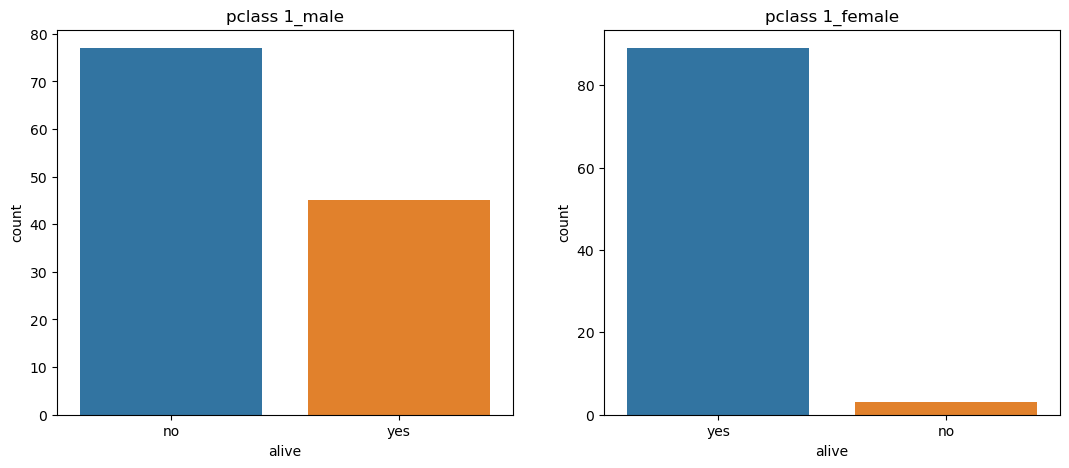

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x=data[(data["pclass"]==1)&(data["sex"]=="male")]["alive"],data=data)
plt.title("pclass 1_male")

plt.subplot(1,3,2)
sns.countplot(x=data[(data["pclass"]==1)&(data["sex"]=="female")]["alive"],data=data)
plt.title("pclass 1_female")


plt.show()

## In Pclass 1 "Female" has higher rate of survial as compared to "male"

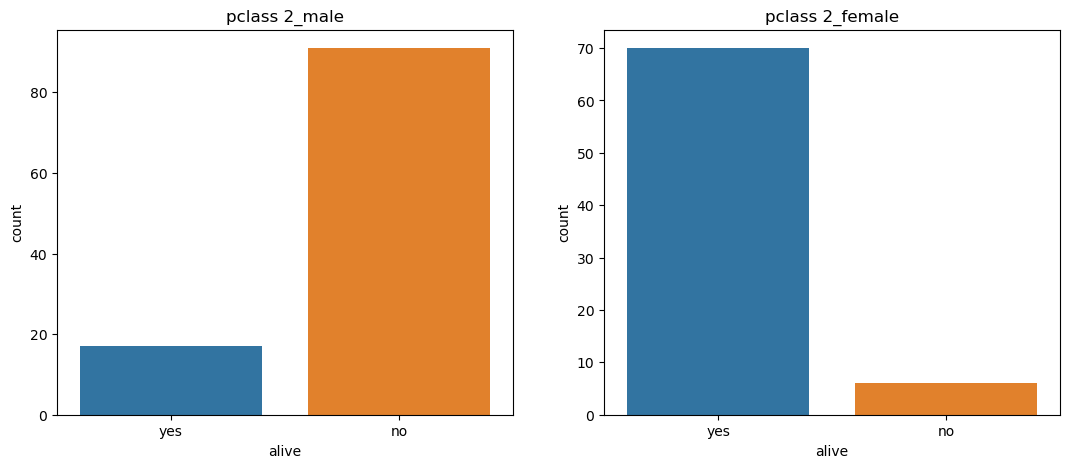

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x=data[(data["pclass"]==2)&(data["sex"]=="male")]["alive"],data=data)
plt.title("pclass 2_male")

plt.subplot(1,3,2)
sns.countplot(x=data[(data["pclass"]==2)&(data["sex"]=="female")]["alive"],data=data)
plt.title("pclass 2_female")


plt.show()

## In Pclass 2 "Female" has higher rate of survial as compared to "male"

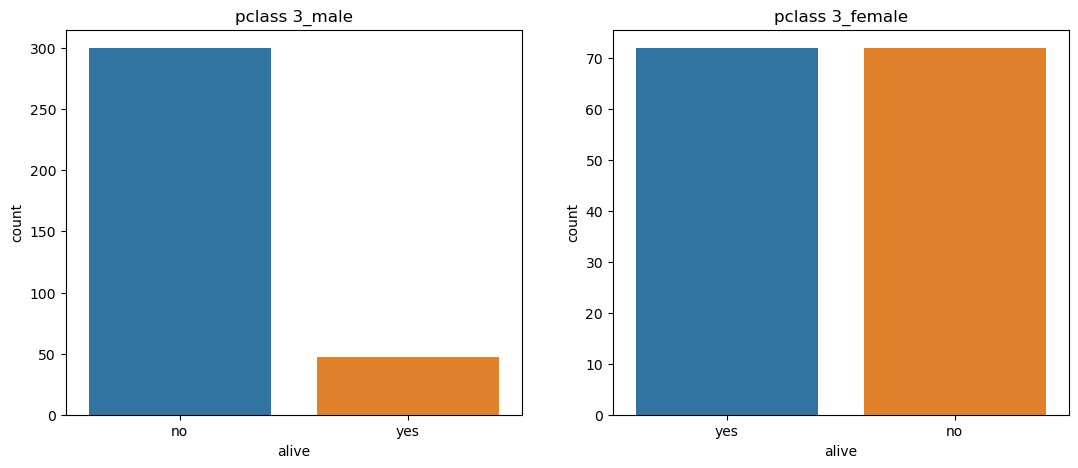

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x=data[(data["pclass"]==3)&(data["sex"]=="male")]["alive"],data=data)
plt.title("pclass 3_male")

plt.subplot(1,3,2)
sns.countplot(x=data[(data["pclass"]==3)&(data["sex"]=="female")]["alive"],data=data)
plt.title("pclass 3_female")


plt.show()

## In Pclass 3 "Female" has higher rate of survial as compared to "male" .among all classess 

In [22]:
data.describe()

,survived,pclass,age,sibsp,parch,fare,family
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681,0.906637
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504,1.614703
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


## measures of spread

In [23]:
range = data.fare.max()-data.fare.min()
range

512.3292

In [24]:
iqr= data.fare.quantile(0.75)-data.fare.quantile(0.25) ## Interquartile Range
iqr

23.1042

In [25]:
data.std() ## Standard Deviation

C:\Users\suchi\AppData\Local\Temp\ipykernel_22152\235067383.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std() ## Standard Deviation


survived       0.486260
pclass         0.834700
age           12.968366
sibsp          1.103705
parch          0.806761
fare          49.697504
adult_male     0.489329
alone          0.489803
family         1.614703
dtype: float64

In [26]:
data.var() ## Variance

C:\Users\suchi\AppData\Local\Temp\ipykernel_22152\4212238173.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var() ## Variance


survived         0.236448
pclass           0.696724
age            168.178525
sibsp            1.218164
parch            0.650863
fare          2469.841935
adult_male       0.239443
alone            0.239907
family           2.607264
dtype: float64

# measures of shape

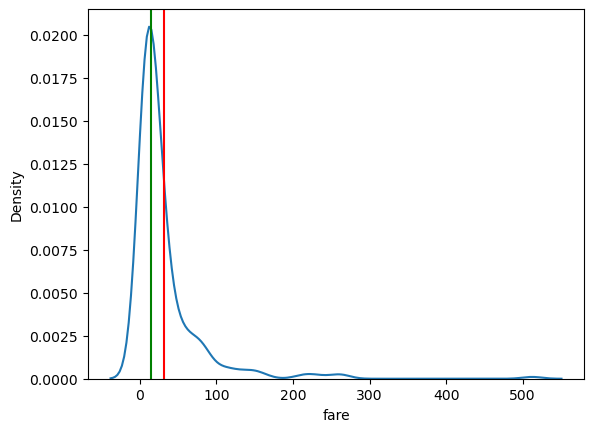

In [27]:
sns.kdeplot(data.fare)
plt.axvline(data["fare"].mean(),color="red")
plt.axvline(data["fare"].median(),color="green")

<Axes: xlabel='fare', ylabel='Density'>

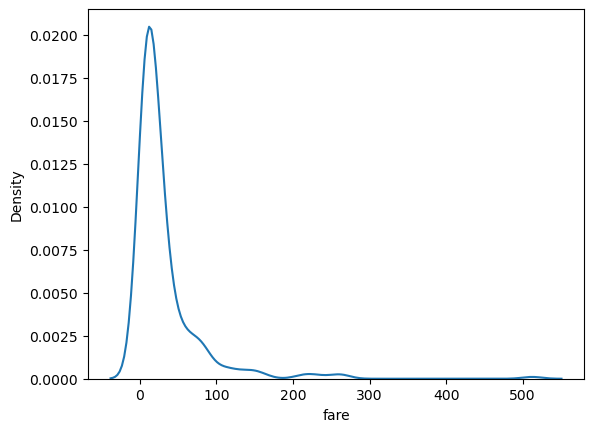

In [28]:
sns.kdeplot(data.fare)

In [ ]:
sns.pairplot(data)
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
sns.displot(data.fare)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data,x=data.pclass,y=data.fare)
plt.tight_layout()
plt.show()